In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import datetime
import time

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm
import statsmodels.formula.api as smf

from fbprophet import Prophet

%matplotlib inline

In [56]:
df = pd.read_table('wisconsin-employment-time-series.tsv', names=['month', 'value'], skiprows=1, dtype={"value": np.float16}).dropna()



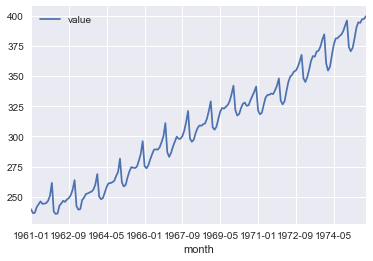

In [57]:
df.plot(x=["month"], y=["value"])

In [62]:
df["y"] = df.month.apply(lambda x: int(x.split("-",1)[0]))
df["m"] = df.month.apply(lambda x: int(x.split("-",1)[1]))

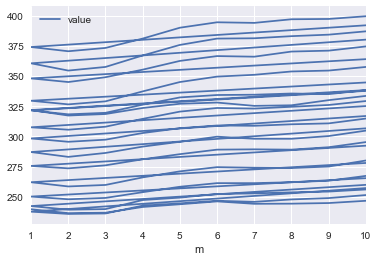

In [89]:
df.plot(x="m", y="value")

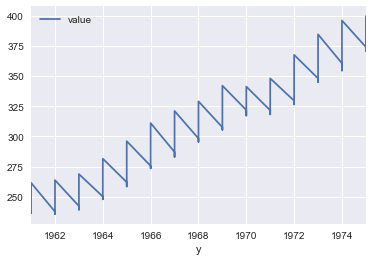

In [90]:
df.plot(x="y", y="value")

## Scikit-learn linear regression

In [127]:
X = df[["m", "y"]]
y = df["value"]

In [159]:
enc = OneHotEncoder()
XS = enc.fit_transform(pd.DataFrame({"m": X["m"]}))
XX = pd.DataFrame(XS.toarray(), dtype=np.int)
XX[["m", "y"]] = df[["m", "y"]]

In [161]:
regr = linear_model.LinearRegression()
regr.fit(XX[:85], y[:85])
y_pred = regr.predict(XX[85:])

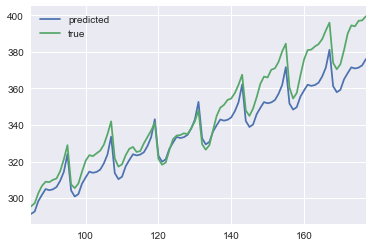

In [162]:
res = pd.DataFrame({"true": y[85:], "predicted": y_pred})
res.plot(y=["predicted", "true"])

In [164]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(res.true, res.predicted))
print('Variance score: %.2f' % r2_score(res.true, res.predicted))

Coefficients: 
 [ 4.02974919 -1.71141462 -2.78525701  0.51590061  1.51348679  2.24321584
 -0.79491226 -2.74375465 -3.87116846 -2.87358228 -0.42956752  6.90730438
  2.4131281   9.50910714]
Mean squared error: 125.94
Variance score: 0.84


## Facebook Prophet

In [167]:
df["day"] = df.month.apply(lambda x: x+"-01")

In [175]:
m = Prophet()
m.fit(pd.DataFrame({"ds": df["day"][:85], "y": y[:85]}))

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [180]:
forecast = m.predict(pd.DataFrame({"ds": df["day"][85:]}))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
88,1975-06-01,383.109208,347.746604,421.694021
89,1975-07-01,382.614070,346.710379,421.617659
90,1975-08-01,383.289617,346.367788,423.338815
91,1975-09-01,384.935811,348.077541,425.508441
92,1975-10-01,388.230439,350.971259,429.553375


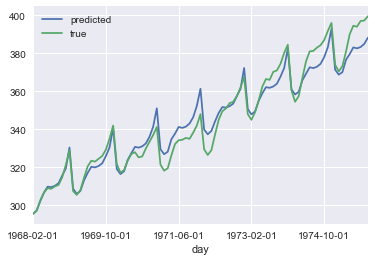

In [197]:
res2 = pd.DataFrame({"day": df["day"][85:].reset_index().day, "true": y[85:].reset_index().value, "predicted": forecast["yhat"]})
res2.plot(y=["predicted", "true"], x="day")

In [198]:
print("Mean squared error: %.2f"
      % mean_squared_error(res2.true, res2.predicted))
print('Variance score: %.2f' % r2_score(res2.true, res2.predicted))

Mean squared error: 35.73
Variance score: 0.95


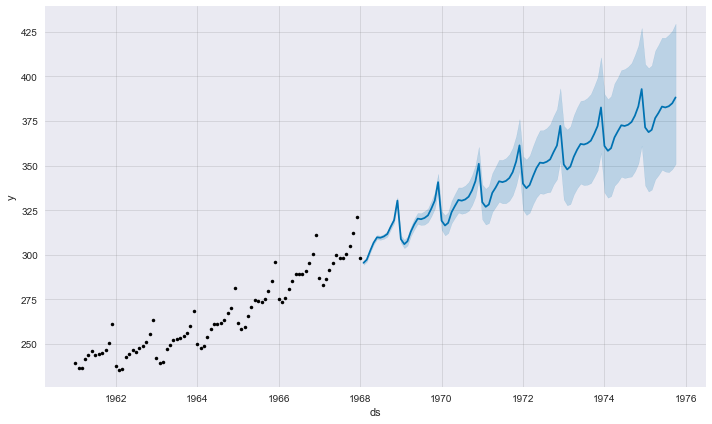

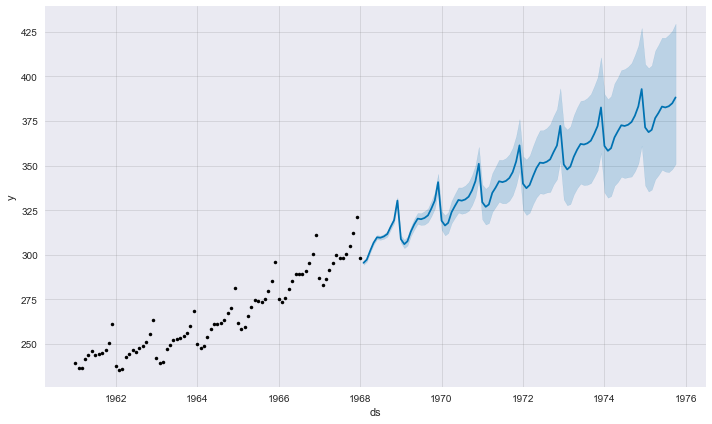

In [199]:
m.plot(forecast)

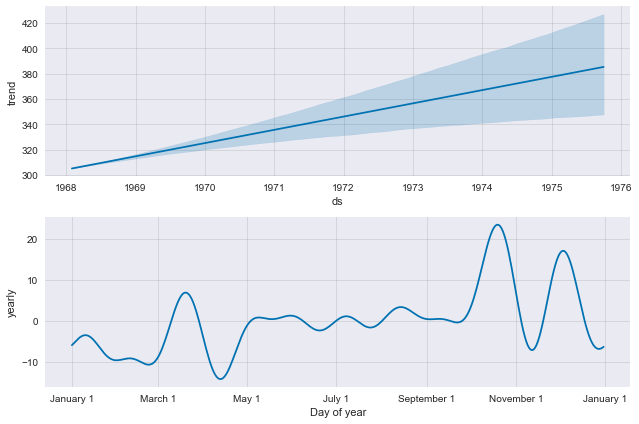

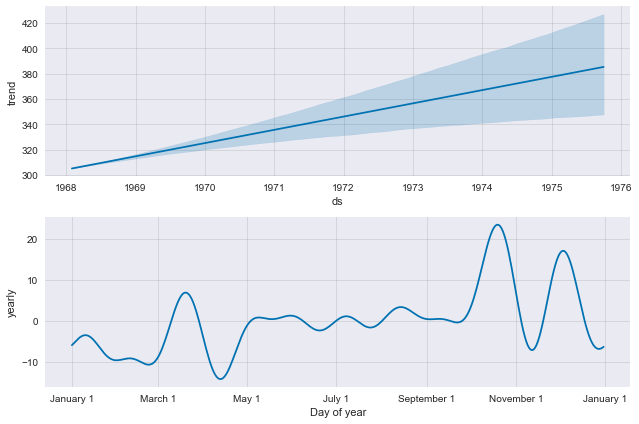

In [200]:
m.plot_components(forecast)